# 1. Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.facecolor'] = '#F0F0F0'

In [2]:
game = pd.read_csv('vgames2_clean.csv', index_col = 0)
game.info()
game.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16142 entries, 1 to 16598
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16142 non-null  object 
 1   Platform     16142 non-null  object 
 2   Year         16142 non-null  int64  
 3   Genre        16142 non-null  object 
 4   Publisher    16142 non-null  object 
 5   NA_Sales     16142 non-null  float64
 6   EU_Sales     16142 non-null  float64
 7   JP_Sales     16142 non-null  float64
 8   Other_Sales  16142 non-null  float64
 9   Total_Sales  16142 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.4+ MB


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
1,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
2,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


# 1. 장르 유행

## Region vs Genre Pie Chart

In [3]:
# Pie Chart Data Preperation
# Create New Genre Column Other
# Sum of the least 5 Genres

genre_sum = game.groupby(['Genre']).sum().drop('Year', axis = 1)

na_pie_df = genre_sum.sort_values('NA_Sales', ascending = False)['NA_Sales']
other = na_pie_df[-5:].sum()
label = list(na_pie_df[-5:].index)
na_pie_df = na_pie_df.drop(label, axis = 0)
sum_df = pd.Series([other], index=['Other'])
na_pie_df = na_pie_df.append(sum_df)

eu_pie_df = genre_sum.sort_values('EU_Sales', ascending = False)['EU_Sales']
other = eu_pie_df[-5:].sum()
label = list(eu_pie_df[-5:].index)
eu_pie_df = eu_pie_df.drop(label, axis = 0)
sum_df = pd.Series([other], index=['Other'])
eu_pie_df = eu_pie_df.append(sum_df)


jp_pie_df = genre_sum.sort_values('JP_Sales', ascending = False)['JP_Sales']
other = jp_pie_df[-5:].sum()
label = list(jp_pie_df[-5:].index)
jp_pie_df = jp_pie_df.drop(label, axis = 0)
sum_df = pd.Series([other], index=['Other'])
jp_pie_df = jp_pie_df.append(sum_df)


other_pie_df = genre_sum.sort_values('Other_Sales', ascending = False)['Other_Sales']
other = other_pie_df[-5:].sum()
label = list(other_pie_df[-5:].index)
other_pie_df = other_pie_df.drop(label, axis = 0)
sum_df = pd.Series([other], index=['Other'])
other_pie_df = other_pie_df.append(sum_df)

/var/folders/dw/94thms1n5817tsrqwqcs_3rr0000gn/T/ipykernel_17685/3198594280.py:12: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  na_pie_df = na_pie_df.append(sum_df)
/var/folders/dw/94thms1n5817tsrqwqcs_3rr0000gn/T/ipykernel_17685/3198594280.py:19: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eu_pie_df = eu_pie_df.append(sum_df)
/var/folders/dw/94thms1n5817tsrqwqcs_3rr0000gn/T/ipykernel_17685/3198594280.py:27: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jp_pie_df = jp_pie_df.append(sum_df)
/var/folders/dw/94thms1n5817tsrqwqcs_3rr0000gn/T/ipykernel_17685/3198594280.py:35: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  other_pie_df 

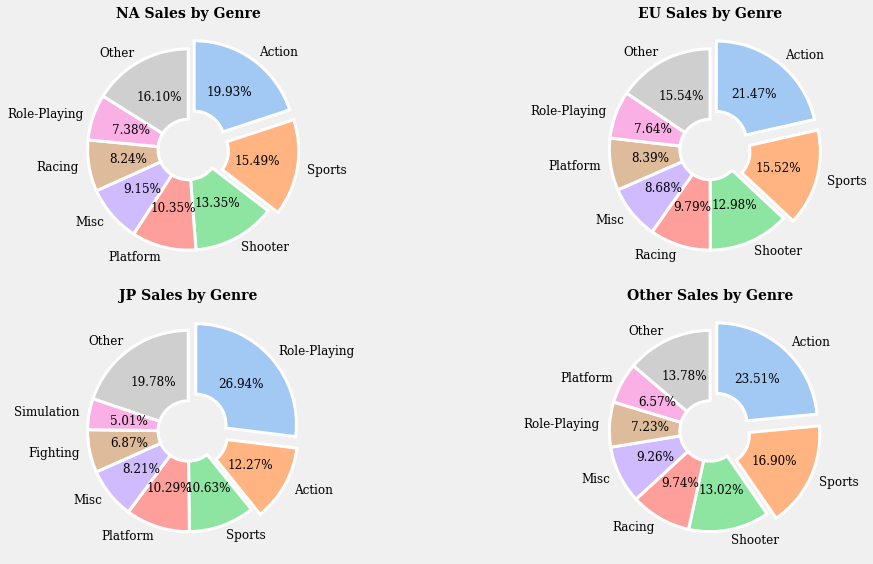

In [4]:
# 지역별 Genre Graph
fig, ax = plt.subplots(figsize=(16,8),facecolor='#F0F0F0')
sns.set_theme(style='whitegrid', palette="pastel")
explode = [0.1, 0.1, 0, 0, 0, 0, 0, 0]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}
font = {'family': 'serif',
         'color': 'black',
         'weight': 'bold',
         'size': 14}
font_pie = {'family': 'serif',
            'color': 'black',
            'size': 12}


plt.subplot(2,2,1)
plt.pie(na_pie_df, labels = na_pie_df.index, 
        explode= explode, wedgeprops=wedgeprops, 
        autopct='%.2f%%', counterclock=False, startangle = 90,
        textprops=font_pie)
plt.title('NA Sales by Genre', fontdict = font)

plt.subplot(2,2,2)
plt.pie(eu_pie_df, labels = eu_pie_df.index, 
        explode= explode, wedgeprops=wedgeprops, 
        autopct='%.2f%%', counterclock=False, startangle = 90,
        textprops=font_pie)
plt.title('EU Sales by Genre', fontdict = font)

plt.subplot(2,2,3)
plt.pie(jp_pie_df, labels = jp_pie_df.index, 
        explode= explode, wedgeprops=wedgeprops, 
        autopct='%.2f%%', counterclock=False, startangle = 90,
        textprops=font_pie)
plt.title('JP Sales by Genre', fontdict = font)

plt.subplot(2,2,4)
plt.pie(other_pie_df, labels = other_pie_df.index, 
        explode= explode, wedgeprops=wedgeprops, 
        autopct='%.2f%%', counterclock=False, startangle = 90,
        textprops=font_pie)
plt.title('Other Sales by Genre', fontdict = font)
fig.tight_layout()
plt.savefig('Graph/1-a Region vs Genre Piechart', dpi = 200)
plt.show()

## Year vs Genre Heatmap

In [5]:
genre_year = game.groupby(['Genre', 'Year']).sum().reset_index()
genre_year = genre_year.pivot(index = 'Genre', columns = 'Year', values = 'Total_Sales')
genre_year = genre_year.fillna(0)
cols = genre_year.columns
cols = cols[::-1]
genre_year = genre_year.sort_values(by = list(cols), axis = 0, ascending = False)

region_df = game.groupby(['Genre']).sum().drop('Year', axis = 1)
total_df= region_df.sort_values('NA_Sales', ascending = False)['Other_Sales']

genre_year = genre_year.sort_values(by = list(cols), axis = 0, ascending = False)

In [6]:
def add_col(df, start, end):
    df[str(start) +'-' + str(end)] = 0
    for i in range(start,end + 1):
        df[str(start) +'-' + str(end)] = df[str(start) +'-' + str(end)] + df[i]
        df = df.drop(i, axis=1)
    return df

year_5_df = genre_year.copy()
year_5_df = add_col(year_5_df,1980,1984)
year_5_df = add_col(year_5_df,1985,1989)
year_5_df = add_col(year_5_df,1990,1994)
year_5_df = add_col(year_5_df,1995,1999)
year_5_df = add_col(year_5_df,2000,2004)
year_5_df = add_col(year_5_df,2005,2009)
year_5_df = add_col(year_5_df,2010,2014)
year_5_df = add_col(year_5_df,2015,2017)

year_5_df['2020'] = year_5_df[2020]
year_5_df = year_5_df.drop(2020, axis = 1)

year_10_df = genre_year.copy()
year_10_df = add_col(year_10_df,1980,1989)
year_10_df = add_col(year_10_df,1990,1999)
year_10_df = add_col(year_10_df,2000,2009)
year_10_df = add_col(year_10_df,2010,2017)

year_10_df['2020'] = year_10_df[2020]
year_10_df = year_10_df.drop(2020, axis = 1)

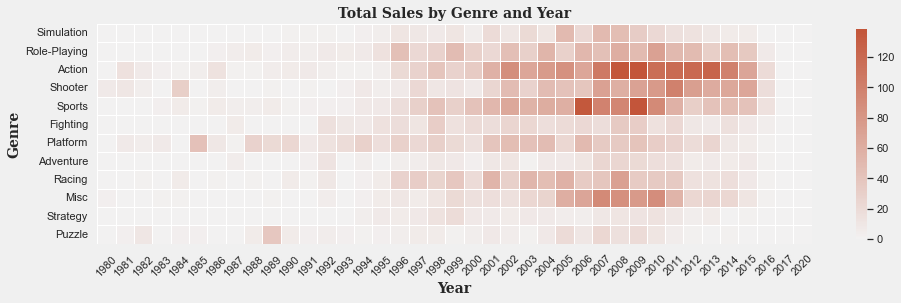

In [7]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
f, ax = plt.subplots(figsize=(16, 8),facecolor='#F0F0F0')
font = {'family': 'serif',
         'weight': 'bold',
         'size': 14}

sns.heatmap(genre_year, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = False)
plt.title('Total Sales by Genre and Year', font = font)
plt.xticks(rotation = 45)
plt.xlabel('Year', font=font)
plt.ylabel('Genre', font=font)
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('Graph/1-b Year vs Genre Heatmap Total Sales', dpi = 200)
plt.show()

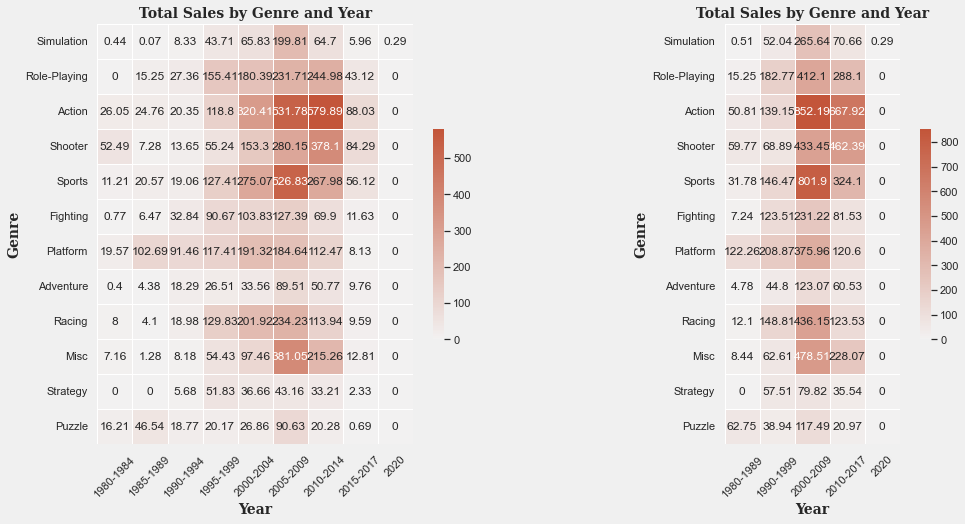

In [8]:
fig, ax = plt.subplots(figsize=(16,8),facecolor='#F0F0F0')
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.set_theme(style='whitegrid', palette="pastel")
plt.subplot(1, 2, 1)
sns.heatmap(year_5_df, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt = 'g')
plt.title('Total Sales by Genre and Year', font = font)
plt.xticks(rotation = 45)
plt.xlabel('Year', font=font)
plt.ylabel('Genre', font=font)

plt.subplot(1, 2, 2)  
sns.heatmap(year_10_df, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt = 'g')
plt.title('Total Sales by Genre and Year', font = font)
plt.xticks(rotation = 45)
plt.xlabel('Year', font=font)
plt.ylabel('Genre', font=font)
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('Graph/1-b 5-10 Year vs Genre Heatmap Total Sales', dpi = 200)
plt.show()

## Sales vs Genre Line Plot

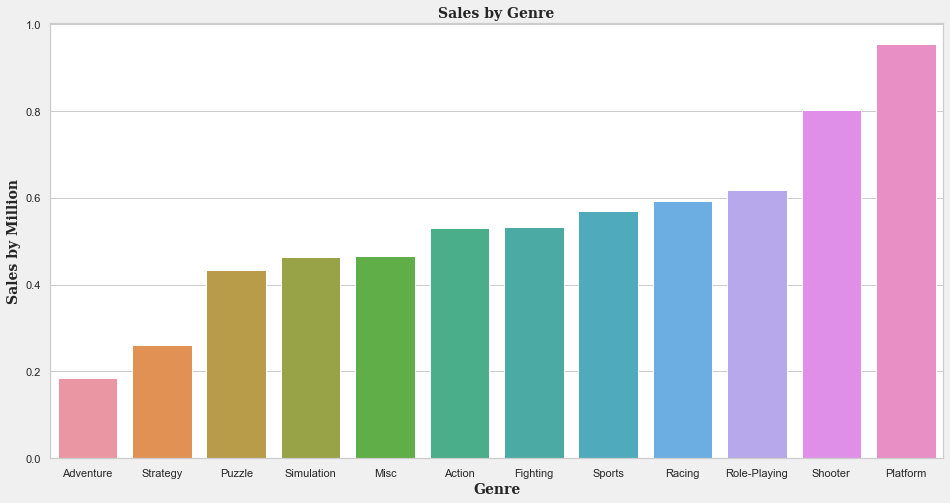

In [9]:
genre_sales = game.groupby(['Genre']).mean().reset_index()
genre_sales = genre_sales.sort_values('Total_Sales', ascending = True)
fig, ax = plt.subplots(figsize = (16, 8),facecolor='#F0F0F0')
sns.set_theme(style='whitegrid', palette="pastel")
font = {'family': 'serif',
         'weight': 'bold',
         'size': 14}


sns.barplot(x = 'Genre', y = 'Total_Sales', data = genre_sales)
plt.xlabel('Genre', fontdict = font)
plt.ylabel('Sales by Million', fontdict = font)
plt.title('Sales by Genre', font = font)
plt.savefig('Graph/1-C Year vs Genre Bar Plot  Genre Sales', dpi = 200)
plt.show()

In [10]:
genre_year = game.groupby(['Genre', 'Year']).sum().reset_index()
genre_year = genre_year.pivot(index = 'Genre', columns = 'Year', values = 'Total_Sales')
genre_year = genre_year.fillna(0)
cols = genre_year.columns
cols = cols[::-1]

genre_year = genre_year.sort_values(by = list(cols), axis = 0, ascending = False)
genre_sum = game.groupby(['Genre']).sum().drop('Year', axis = 1)
ordered_genre_year = genre_sum.sort_values('Total_Sales', ascending = False)['Total_Sales']
order = list(ordered_genre_year.index)[:5]

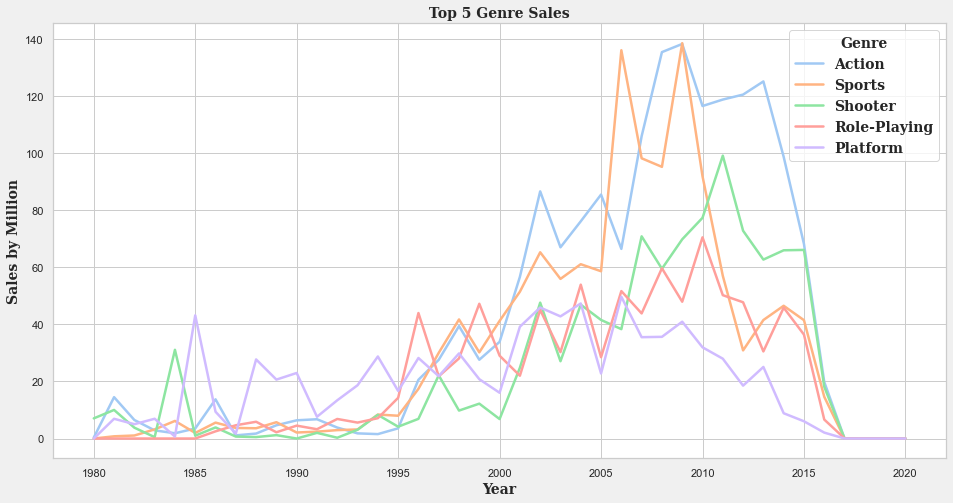

In [11]:
fig, ax = plt.subplots(figsize = (16, 8),facecolor='#F0F0F0')
sns.set_theme(style='whitegrid', palette="pastel")
font = {'family': 'serif',
         'weight': 'bold',
         'size': 14}

for i in order:
    sns.lineplot(data=genre_year.T[i], markers = False, linewidth=2.5)
plt.legend(order, title = 'Genre', prop = font, title_fontproperties = font)
plt.xlabel('Year', fontdict = font)
plt.ylabel('Sales by Million', fontdict = font)
plt.title('Top 5 Genre Sales', font = font)
plt.savefig('Graph/1-C Year vs Genre Line Plot Top 5 Genre Sales', dpi = 200)
plt.show()

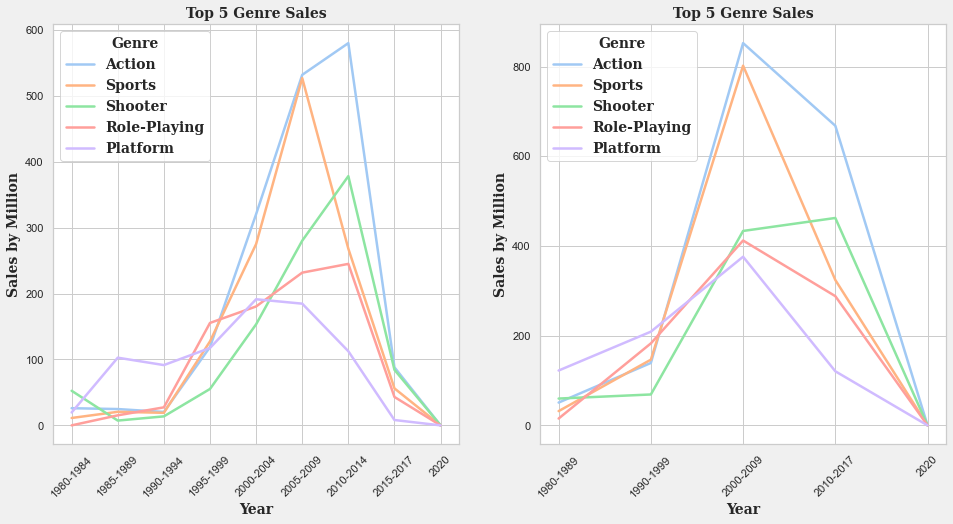

In [12]:
fig, ax = plt.subplots(1, 2, figsize = (16, 8),facecolor='#F0F0F0')
sns.set_theme(style='whitegrid', palette="pastel")
font = {'family': 'serif',
         'weight': 'bold',
         'size': 14}
plt.subplot(1, 2, 1)

for i in order:
    sns.lineplot(data=year_5_df.T[i], markers = False, linewidth=2.5)
plt.legend(order, title = 'Genre', prop = font, title_fontproperties = font)
plt.xlabel('Year', fontdict = font)
plt.ylabel('Sales by Million', fontdict = font)
plt.xticks(np.arange(0, 9), rotation = 45)
plt.title('Top 5 Genre Sales', font = font)


plt.subplot(1, 2, 2)
for i in order:
    sns.lineplot(data=year_10_df.T[i], markers = False, linewidth=2.5)
plt.legend(order, title = 'Genre', prop = font, title_fontproperties = font)
plt.xlabel('Year', fontdict = font)
plt.ylabel('Sales by Million', fontdict = font)
plt.xticks(rotation = 45)
plt.title('Top 5 Genre Sales', font = font)
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig('Graph/1-C 5-10 Year vs Genre Line Plot Top 5 Genre Sales', dpi = 200)

plt.show()

# 2. 연도별 게임에 대한 인기도 변화

## 연도별 게임 총 출고량의 변화 (Lineplot)

In [13]:
year_sale = game.groupby(by = ['Year']).sum()
year_sale = year_sale[["Total_Sales", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]

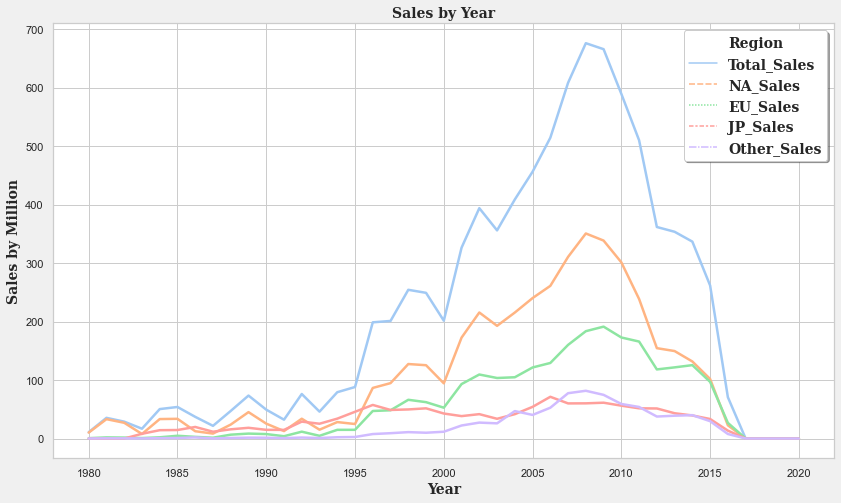

In [14]:
fig, ax = plt.subplots(figsize=(14,8),facecolor='#F0F0F0')
sns.set_theme(style='whitegrid', palette="pastel")
font = {'family': 'serif',
         'weight': 'bold',
         'size': 14}

sns.lineplot(data=year_sale, markers = False, linewidth=2.5)

for i in range(5):
    ax.lines[i].set_linestyle("-")
    
plt.legend(title = 'Region', fontsize = 'large', 
           prop = font,
           title_fontproperties = font,
           frameon=True, shadow=True)
plt.xlabel('Year', fontdict = font)
plt.ylabel('Sales by Million', fontdict = font)
plt.title('Sales by Year',fontdict = font)
plt.savefig('Graph/2-a Year vs Sale Sales by Year', dpi = 200)
plt.show()

# 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

## Analysis

In [15]:
top_5 = game.sort_values('Total_Sales', ascending = False)[:5]
top_50 = game.sort_values('Total_Sales', ascending = False)[:50]

In [16]:
def des_game(df):
    print('----------------------------')
    print("Number of Series Game : ", len(df))
    print('-')
    print("Total NA Sales : ", df.sum()['NA_Sales'].round(2))
    print("Mean NA Sales : ", df.describe().loc['mean', 'NA_Sales'].round(2))
    print("Max NA Sales : ", df.describe().loc['max', 'NA_Sales'].round(2))
    print('-')
    print("Total EU Sales : ", df.sum()['EU_Sales'].round(2))
    print("Mean EU Sales : ", df.describe().loc['mean', 'EU_Sales'].round(2))
    print("Max EU Sales : ", df.describe().loc['max', 'EU_Sales'].round(2))
    print('-')
    print("Total JP Sales : ", df.sum()['JP_Sales'].round(2))
    print("Mean JP Sales : ", df.describe().loc['mean', 'JP_Sales'].round(2))
    print("Max JP Sales : ", df.describe().loc['max', 'JP_Sales'].round(2))
    print('-')
    print("Total Other Sales : ", df.sum()['Other_Sales'].round(2))
    print("Mean Other Sales : ", df.describe().loc['mean', 'Other_Sales'].round(2))
    print("Max Other Sales : ", df.describe().loc['max', 'Other_Sales'].round(2))
    print('-')
    print("Total Sales : ", df.sum()['Total_Sales'].round(2))
    print("Mean Total Sales : ", df.describe().loc['mean', 'Total_Sales'].round(2))
    print("Max Total Sales : ", df.describe().loc['max', 'Total_Sales'].round(2))
    print('----------------------------')

In [17]:
wii_sports = game[game['Name'].str.contains('Wii Sports')]
mario = game[game['Name'].str.contains('Mario')]
pokemon = game[game['Name'].str.contains('Pokemon')]

In [18]:
print('Game Series Mario')
des_game(mario)

Game Series Mario
----------------------------
Number of Series Game :  112
-
Total NA Sales :  277.95
Mean NA Sales :  2.48
Max NA Sales :  29.08
-
Total EU Sales :  131.17
Mean EU Sales :  1.17
Max EU Sales :  12.88
-
Total JP Sales :  116.1
Mean JP Sales :  1.04
Max JP Sales :  6.81
-
Total Other Sales :  30.06
Mean Other Sales :  0.27
Max Other Sales :  3.31
-
Total Sales :  555.28
Mean Total Sales :  4.96
Max Total Sales :  40.24
----------------------------


In [19]:
print('Game Series Pokemon')
des_game(pokemon)

Game Series Pokemon
----------------------------
Number of Series Game :  34
-
Total NA Sales :  73.91
Mean NA Sales :  2.17
Max NA Sales :  11.27
-
Total EU Sales :  45.66
Mean EU Sales :  1.34
Max EU Sales :  8.89
-
Total JP Sales :  60.1
Mean JP Sales :  1.77
Max JP Sales :  10.22
-
Total Other Sales :  8.42
Mean Other Sales :  0.25
Max Other Sales :  1.37
-
Total Sales :  188.09
Mean Total Sales :  5.53
Max Total Sales :  31.38
----------------------------


In [20]:
print('Game Series Wii Sports')
des_game(wii_sports)

Game Series Wii Sports
----------------------------
Number of Series Game :  3
-
Total NA Sales :  57.43
Mean NA Sales :  19.14
Max NA Sales :  41.49
-
Total EU Sales :  40.17
Mean EU Sales :  13.39
Max EU Sales :  29.02
-
Total JP Sales :  7.09
Mean JP Sales :  2.36
Max JP Sales :  3.77
-
Total Other Sales :  11.45
Mean Other Sales :  3.82
Max Other Sales :  8.46
-
Total Sales :  116.14
Mean Total Sales :  38.71
Max Total Sales :  82.74
----------------------------


## Publisher Pie Chart

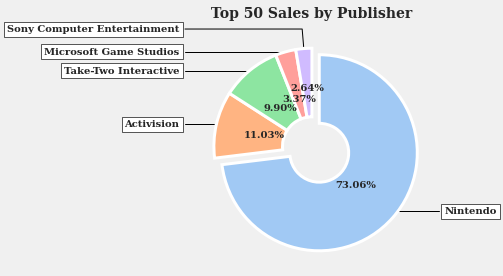

In [21]:
top_50_publisher = top_50.groupby('Publisher').sum().sort_values('Total_Sales', ascending = False)
fig, ax = plt.subplots(figsize=(8, 4), subplot_kw=dict(aspect="equal"),facecolor='#F0F0F0')
sns.set_theme(style='whitegrid', palette="pastel")
explode = [0.1, 0, 0, 0, 0]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}
font = {'family': 'serif',
         'weight': 'bold',
         'size': 14}
font_pie = {'family': 'serif',
            'weight' : 'bold',
            'size': 10}

labels = top_50_publisher['Total_Sales'].index


wedges, texts= ax.pie(top_50_publisher['Total_Sales'], explode= explode, wedgeprops=wedgeprops, 
                            counterclock=False, startangle = 90,
                         textprops=font_pie)
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(edgecolor='black',
                          fill=False, arrowstyle="-"),
                          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    if i!=4:
        ax.annotate(labels[i], xy=(x, y), xytext=(1.35*np.sign(x), y),
                horizontalalignment=horizontalalignment, **kw, fontproperties=font_pie)
    
ax.annotate(labels[4], xy=(x, y), xytext=(1.35*np.sign(x), 1.2 * y),
            horizontalalignment=horizontalalignment, **kw, fontproperties=font_pie)

labels = ['{0} - {1:1.1f} %'.format(i, j) for i, j in zip(labels,
100.*top_50_publisher['Total_Sales']/top_50_publisher['Total_Sales'].sum())]

labels_frequency = zip(labels,top_50_publisher['Total_Sales']) 
labels_frequency = sorted(labels_frequency,key=lambda x: x[1],reverse=True)
 
sorted_labels = [x[0] for x in labels_frequency] ## 정렬된 라벨
sorted_frequency = [x[1] for x in labels_frequency] ## 정렬된 빈도수
 
total = np.sum(top_50_publisher['Total_Sales']) ## 빈도수 합
 
threshold = 5
sum_pct = 0 
count_less_5pct = 0 
spacing = 0.1
for i,l in enumerate(sorted_labels):
    ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2 ## 파이의 시작 각도와 끝 각도
    center, r = ax.patches[i].center, ax.patches[i].r ## 파이의 중심 좌표
    
    ## 비율 상한선보다 작은 것들은 계단형태로 만든다.
    if sorted_frequency[i]/total*100 < threshold:
        x = (r/2+spacing*count_less_5pct)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/2+spacing*count_less_5pct)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
        count_less_5pct += 1
    else:
        x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
    
    ## 퍼센티지 출력
    if i < len(labels) - 1:
        sum_pct += float(f'{sorted_frequency[i]/total*100:.2f}')
        ax.text(x,y,f'{sorted_frequency[i]/total*100:.2f}%',ha='center',va='center',fontproperties=font_pie)
    else: ## 마지막 파이 조각은 퍼센티지의 합이 100이 되도록 비율을 조절
        ax.text(x,y,f'{100-sum_pct:.2f}%',ha='center',va='center',fontproperties=font_pie)
 


plt.title('Top 50 Sales by Publisher', fontdict = font)
fig.tight_layout()
plt.savefig('Graph/3-aTop 50 Sales by Publisher', dpi = 200)
plt.show()

## Platform and Genre Pie Chart

In [22]:
nintendo =['3DS', 'DS', 'GB', 'GBA', 'N64', 'NES', 'SNES', 'Wii']
playstation = ['PS2' , 'PS3', 'PS4']
platform_df = top_50.groupby('Platform').sum().T
platform_df['Nintendo'] = 0
platform_df['Play Station'] = 0

for i in nintendo:
    platform_df['Nintendo'] += platform_df[i]
for i in playstation:
    platform_df['Play Station'] += platform_df[i] 
platform_df['X Box'] = platform_df['X360']
platform_df = platform_df[['Nintendo', 'Play Station', 'X Box']]
platform_df = platform_df.T['Total_Sales']

In [23]:
top_50_genre = top_50.groupby('Genre').sum().sort_values('Total_Sales', ascending = False)['Total_Sales']
other = top_50_genre[-4:].sum()
label = list(top_50_genre[-4:].index)
top_50_genre = top_50_genre.drop(label, axis = 0)
sum_df = pd.Series([other], index=['Other'])
top_50_genre = top_50_genre.append(sum_df)
top_50_genre

/var/folders/dw/94thms1n5817tsrqwqcs_3rr0000gn/T/ipykernel_17685/716133868.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_50_genre = top_50_genre.append(sum_df)


Platform        178.32
Sports          160.46
Shooter         151.59
Role-Playing    129.95
Action          111.72
Racing           98.09
Misc             71.05
Other           106.81
dtype: float64

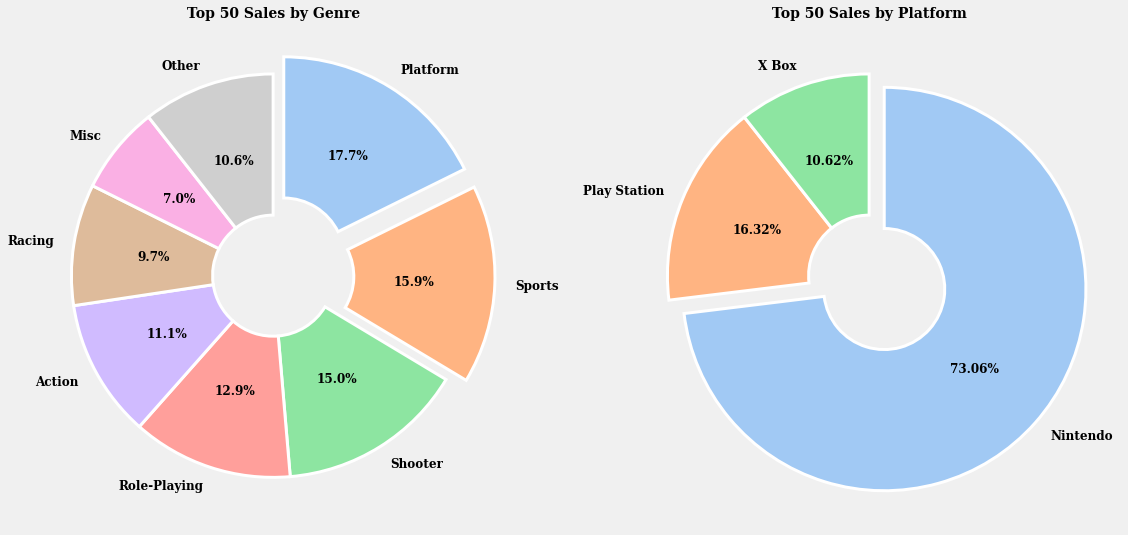

In [24]:
fig, ax = plt.subplots(figsize=(16,8),facecolor='#F0F0F0')
sns.set_theme(style='whitegrid', palette="pastel")
explode = [0.1, 0, 0]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}
font = {'family': 'serif',
         'color': 'black',
         'weight': 'bold',
         'size': 14}
font_pie = {'family': 'serif',
            'weight' : 'bold',
            'color': 'black',
            'size': 12}

plt.subplot(1,2,2)
plt.pie(platform_df, labels = platform_df.index, 
        explode= explode, wedgeprops=wedgeprops, 
        autopct='%.2f%%', counterclock=False, startangle = 90,
        textprops=font_pie)
plt.title('Top 50 Sales by Platform', fontdict = font)

plt.subplot(1,2,1)
explode = [0.1, 0.1 , 0, 0, 0, 0, 0, 0]
plt.pie(top_50_genre, labels = top_50_genre.index, 
        explode= explode, wedgeprops=wedgeprops, 
        autopct='%.1f%%', counterclock=False, startangle = 90,
        textprops=font_pie)
plt.title('Top 50 Sales by Genre', fontdict = font)


fig.tight_layout()
plt.savefig('Graph/3-b Top 50 Sales by Platform and Genre', dpi = 200)
plt.show()